In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly.graph_objs as go
#import plotly.offline as py
#import plotly.tools as tls
#from statsmodels.stats import weightstats as stests
from scipy import stats

import datetime
from datetime import datetime
import statistics as es 
import csv
import re 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)



In [2]:
tweets=pd.read_csv('tweets.csv', sep=',')
tweets.drop("Unnamed: 0", axis=1, inplace=True)
users=pd.read_csv('users.csv', sep=',')
users.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
#transform id´s in object
tweets.user_id=tweets.user_id.astype(str)
users.user_id=users.user_id.astype(str)
print(users.user_id.dtypes)
print(tweets.user_id.dtypes)

object
object


# Descriptive Analysis Tweets Table

In [4]:
tweets.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,type,n_tweets,year,n_retweet_mean,n_favorite_mean,n_hashtags_mean,n_urls_mean,n_mentions_mean,size_twitter,media_size_twitter,dp_size_twitter,in_tweets_reply,n_tweet_dia,max_count_tweet_dia,count_dias_tweet,in_tweet_dia
count,5.364000e+05,5.364000e+05,5.364000e+05,536400.000000,5.364000e+05,5.364000e+05,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000,536400.000000
mean,4.777728e+17,5.461559e+16,8.622260e+07,0.125625,5.901138e+16,3.610340e+02,0.587603,0.153965,0.186887,0.350608,1.108501,2256.973900,2013.847064,361.033993,0.587603,0.153965,0.186887,0.350608,80.098878,80.098878,27.145494,25.124907,5.378203,13.841163,98.205071,2.677712
std,1.297031e+17,1.604141e+17,3.810824e+08,0.331426,1.666512e+17,1.375679e+04,3.036029,0.591551,0.396017,0.726731,1.214417,1012.461367,1.167146,1832.616411,1.831294,0.273464,0.233558,0.434863,36.395946,15.621029,4.766513,36.009929,9.878361,12.748867,38.618580,2.607500
min,1.339631e+07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.800000,1.766400,0.000000,1.000000,3.000000,3.000000,1.058201
25%,4.770624e+17,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1342.000000,2014.000000,0.110000,0.030000,0.035000,0.025000,0.000000,53.000000,71.680000,24.160000,0.000000,1.000000,7.000000,59.000000,1.600000
50%,5.158380e+17,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,2753.500000,2014.000000,1.880000,0.215000,0.075000,0.060000,0.045000,77.000000,83.895000,27.639800,0.000000,3.000000,10.000000,102.000000,1.960784
75%,5.286693e+17,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,3212.000000,2014.000000,82.315000,0.535000,0.155000,0.365000,0.700000,109.000000,88.780000,29.831600,46.000000,5.000000,17.000000,125.000000,3.389831
max,5.941401e+17,5.941334e+17,3.215616e+09,1.000000,5.941355e+17,3.350110e+06,486.000000,28.000000,5.000000,17.000000,4.000000,3258.000000,2015.000000,34467.900000,65.340000,6.275000,1.290000,2.885000,160.000000,157.810000,47.769500,194.000000,127.000000,127.000000,189.000000,66.666667


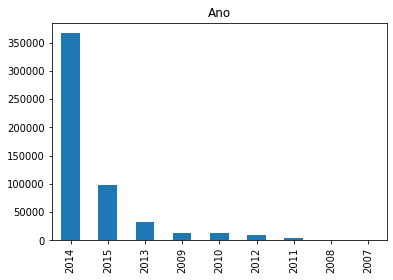

In [5]:
#main month of tweets
tweets['year'].value_counts().sort_values(ascending=False).head(14).plot(kind='bar', title='Ano')

In [6]:
tweets.columns

Index(['id', 'text', 'source', 'user_id', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'retweet_count', 'favorite_count', 'num_hashtags', 'num_urls',
       'num_mentions', 'timestamp', 'type', 'n_tweets', 'Class', 'year_month',
       'year_month_day', 'year', 'n_retweet_mean', 'n_favorite_mean',
       'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean', 'size_twitter',
       'media_size_twitter', 'dp_size_twitter', 'in_tweets_reply',
       'n_tweet_dia', 'max_count_tweet_dia', 'count_dias_tweet',
       'in_tweet_dia'],
      dtype='object')

In [7]:
numerical =['retweet_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions', 'n_tweet_dia'] #unicas para cada twitter com alta dipersao
numerical_2= ['size_twitter','dp_size_twitter'] #unicas para cada twiiter com dispersao menor
numerical_3 = ['count_dias_tweet','in_tweet_dia', 'max_count_tweet_dia','in_tweets_reply'] # iguais para todo o grupo de  200 tweets de um usuario. Varia de usuario por usuario.

Bot        327400
Genuino    209000
Name: Class, dtype: int64
 rate of Bots 0.610365398956003


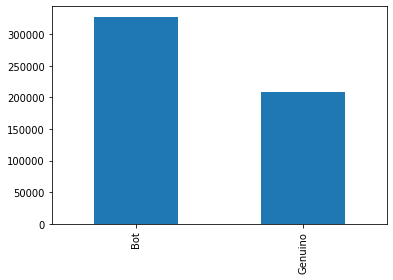

In [8]:
#classes status
tweets['Class'].value_counts().plot(kind='bar')
print(tweets['Class'].value_counts())
print(" rate of Bots",tweets[tweets['Class']=='Bot']['id'].count()/tweets.shape[0])

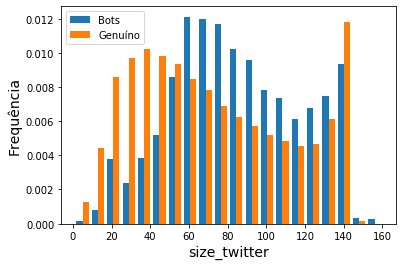

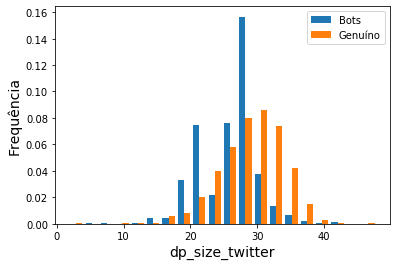

In [9]:
for x in numerical_2: 
    x1=tweets[tweets.type==0][x]
    x2=tweets[tweets.type!=0][x]
    plt.figure()
    labels= ["Bots","Genuíno"]
    #colors = ['orange','blue']
    plt.hist([x2,x1],bins=20, label=labels,density=1)
    plt.legend(labels)
    plt.xlabel(x, fontsize=14) 
    plt.ylabel("Frequência", fontsize=14) 
    #plt.suptitle(x)
    plt.show()


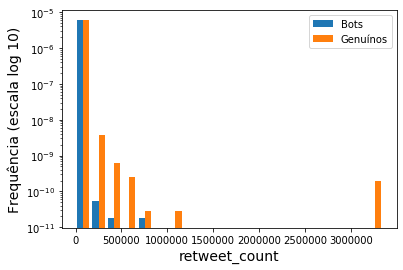

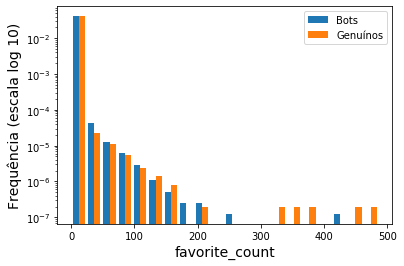

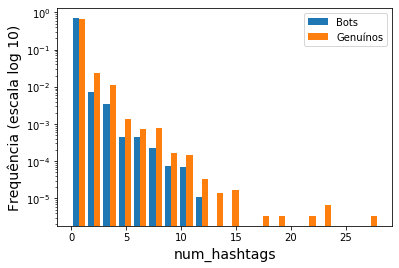

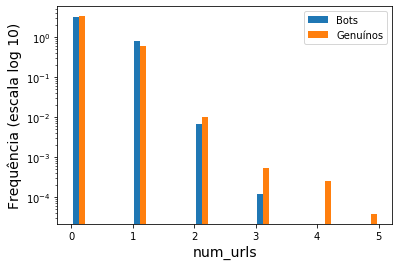

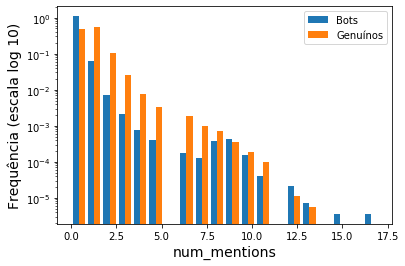

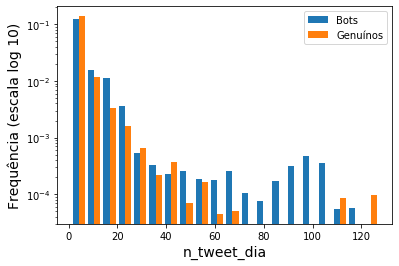

In [10]:
#Features with a large dispersion, i will use the logatimic scale, for better visualization
for x in numerical: 
    x1=tweets[tweets.type==0][x]
    x2=tweets[tweets.type!=0][x]
    plt.figure()
    labels= ["Bots","Genuínos"]
    #colors = ['Blue', 'Orange']
    plt.hist([x2,x1],bins=20, density=1, label=labels, log=True)
    plt.legend(labels)
    plt.xlabel(x, fontsize=14) 
    plt.ylabel("Frequência (escala log 10)", fontsize=14) 
    #plt.suptitle(x)
    plt.show()

    

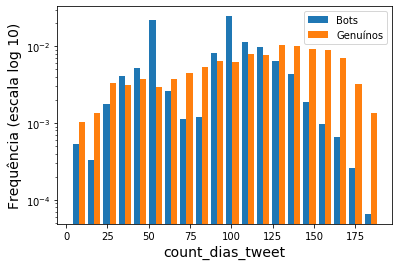

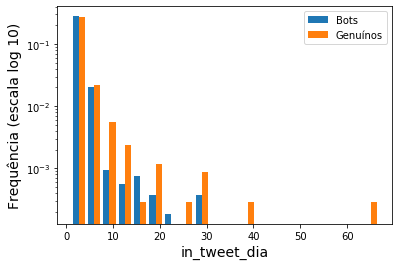

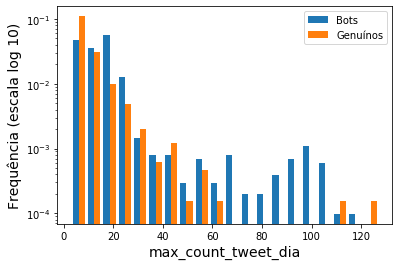

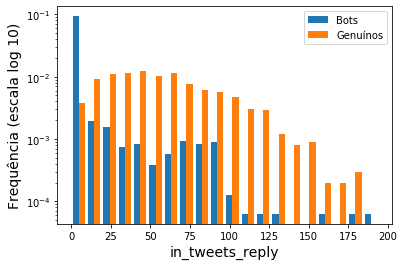

In [11]:
for x in numerical_3: 
    x1=tweets[tweets.type==0].drop_duplicates('user_id')[x]
    x2=tweets[tweets.type!=0].drop_duplicates('user_id')[x]
    labels= ["Bots","Genuínos"]
    #colors = ['blue', 'orange']
    plt.hist([x2,x1],bins=20, density=1, label=labels, log=True)
    plt.legend(labels)
    plt.xlabel(x, fontsize=14) 
    plt.ylabel("Frequência (escala log 10)", fontsize=14) 
    #plt.suptitle(x)
    plt.show()


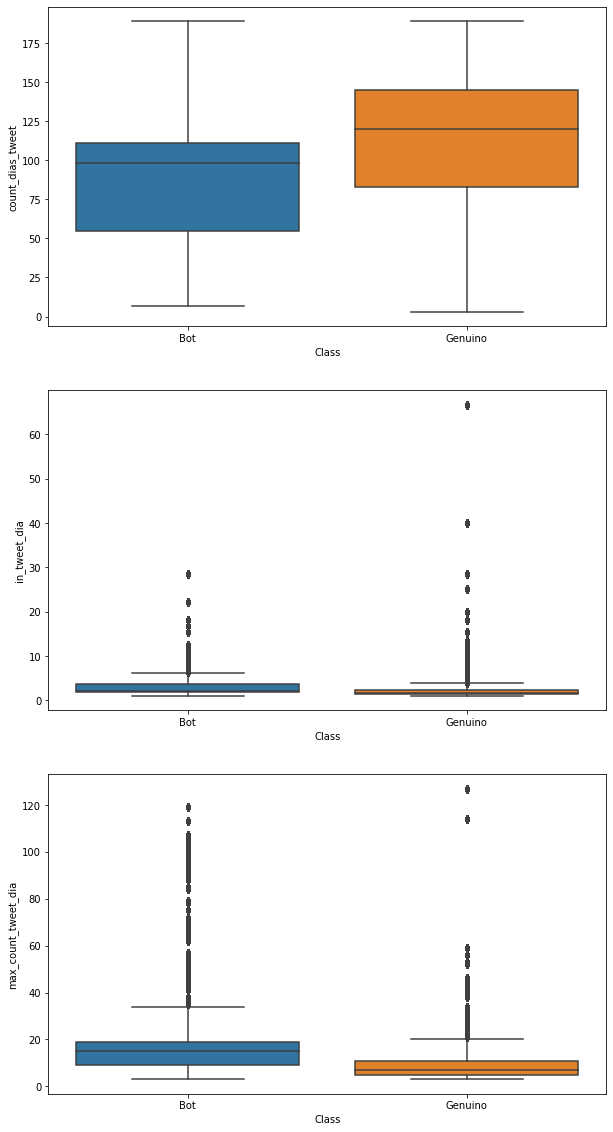

In [12]:
#boxplot, in some times is better to understand the distribution
fig, ax = plt.subplots(3, figsize=(10, 20))
for var, subplot in zip(numerical_3, ax.flatten()):
    sns.boxplot(x='Class', y=var, data=tweets, ax=subplot)

# Descriptive Analysis Users Table

In [13]:
users.columns 

Index(['user_id', 'statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'location',
       'default_profile', 'default_profile_image', 'profile_banner_url',
       'profile_image_url_https', 'verified', 'timestamp', 'Alvo', 'age',
       'in_following_followers', 'n_alfa_sname', 'n_number_sname',
       'size_sname', 'size_description', 'size_name', 'in_number_sname'],
      dtype='object')

In [14]:
users.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,location,default_profile,default_profile_image,profile_banner_url,profile_image_url_https,verified,Alvo,age,in_following_followers,n_alfa_sname,n_number_sname,size_sname,size_description,size_name,in_number_sname
count,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000
mean,10787.033930,2137.898583,1425.043997,1960.497763,19.215138,0.297166,0.612603,0.216257,0.000746,0.406786,0.957494,0.002610,0.610365,1036.398583,1.475897,11.412006,0.273676,11.685682,63.352349,11.758016,0.025083
std,24149.398623,21529.905212,3100.558496,7002.508293,143.477326,0.457096,0.487247,0.411768,0.027303,0.491326,0.201777,0.051031,0.487758,599.239166,2.291934,2.508898,0.798899,2.364416,44.086484,4.307292,0.073756
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,249.250000,120.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,718.000000,0.564095,10.000000,0.000000,10.000000,31.000000,9.000000,0.000000
50%,2637.000000,543.500000,564.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,873.000000,1.065334,12.000000,0.000000,12.000000,57.000000,13.000000,0.000000
75%,11761.500000,1293.000000,1745.750000,844.250000,7.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1183.750000,1.662419,13.000000,0.000000,14.000000,89.000000,15.000000,0.000000
max,333504.000000,986837.000000,90861.000000,185467.000000,4840.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3021.000000,42.666667,15.000000,9.000000,15.000000,288.000000,23.000000,0.600000


In [15]:
numerical= ['statuses_count','followers_count','friends_count','favourites_count','listed_count','age',
       'in_following_followers', 'size_sname', 'size_description', 'size_name',
       'in_number_sname',"n_number_sname"]
categorical =['url', 'location','default_profile', 'default_profile_image', 'profile_banner_url',
       'profile_image_url_https', 'verified']

In [16]:
users[categorical]=users[categorical].astype(str)

In [17]:
users.Alvo.value_counts()

1    1637
0    1045
Name: Alvo, dtype: int64

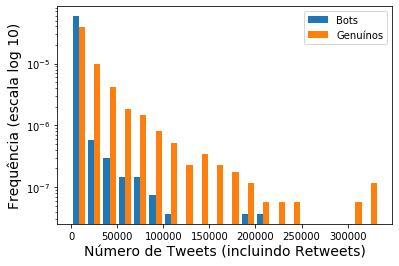

In [18]:
m1=users[users.Alvo==0][numerical[0]]
m2=users[users.Alvo==1][numerical[0]]
labels= ["Bots","Genuínos"]
colors = ['blue', 'orange']
plt.hist([m2,m1],20, label=labels, density=True, log=True)
plt.legend(labels)
plt.xlabel("Número de Tweets (incluindo Retweets)", fontsize=14) 
plt.ylabel("Frequência (escala log 10)", fontsize=14) 
plt.savefig('figures/statuses_count.png')
plt.show()


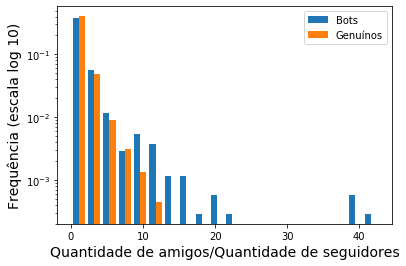

In [19]:
m1=users[users.Alvo==0][numerical[6]]
m2=users[users.Alvo==1][numerical[6]]
labels= ["Bots","Genuínos"]
colors = ['blue', 'orange']
plt.hist([m2,m1],20, label=labels, density=True, log=True)
plt.legend(labels)
plt.xlabel("Quantidade de amigos/Quantidade de seguidores", fontsize=14) 
plt.ylabel("Frequência (escala log 10)", fontsize=14) 
plt.savefig('figures/in_following_followers.png')
plt.show()

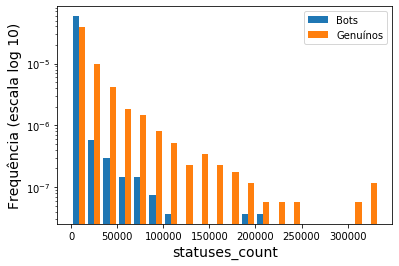

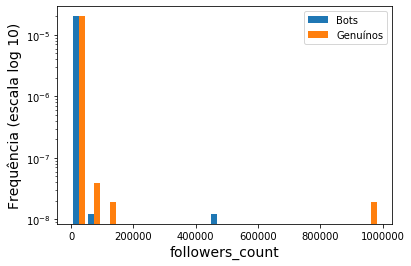

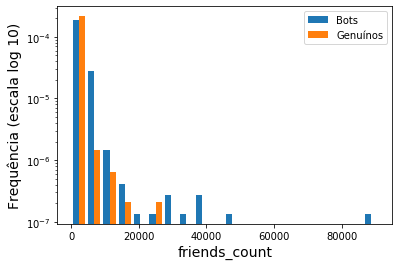

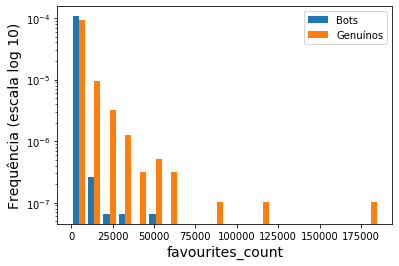

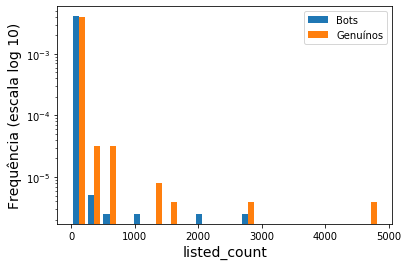

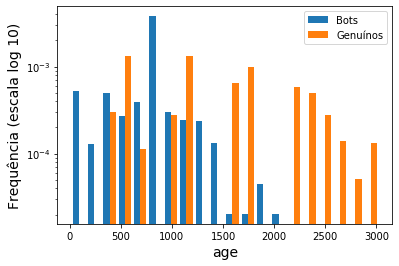

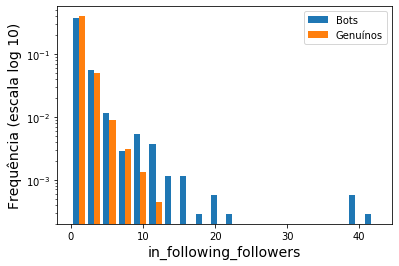

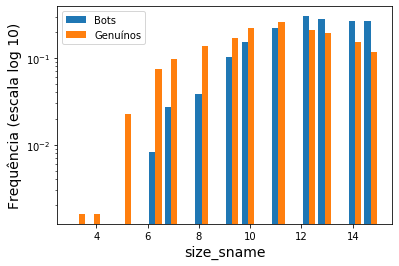

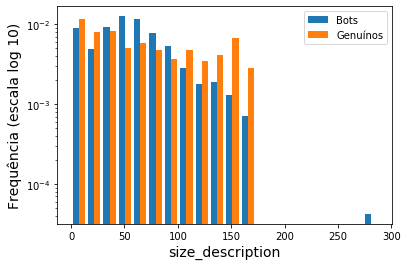

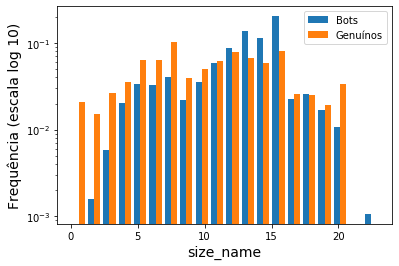

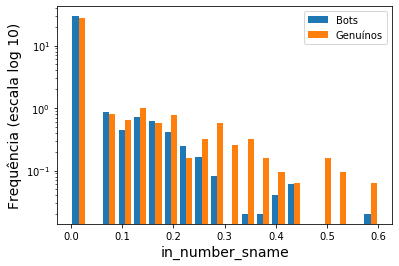

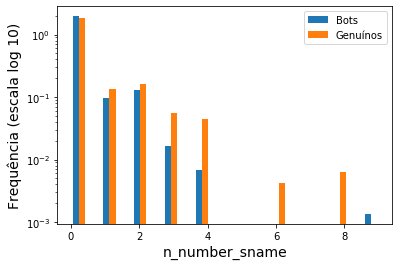

In [20]:
for x in numerical: 
    x1=users[users.Alvo==0][x]
    x2=users[users.Alvo==1][x]
    labels= ["Bots","Genuínos"]
    colors = ['blue', 'orange']
    plt.hist([x2,x1],20, label=labels, density=True, log=True)
    plt.legend(labels)
    plt.xlabel(x, fontsize=14) 
    plt.ylabel("Frequência (escala log 10)", fontsize=14) 
    #plt.suptitle(x)
    plt.show()



In [21]:
#even after the filtering, when we get only users who have at least 200 tweets (Users_Manipulation notebook), 
#already have users whith smaller "statues_count" ?
print("users with incompatible statuses_counnt:",users[users['statuses_count']<200]['user_id'].count())

users with incompatible statuses_counnt: 577


In [22]:
#But, are all really present in tweets sample ?
users[users['statuses_count']<200]['user_id'].isin(tweets.user_id).sum()

577

The "statuses_count" field is bad control

In [23]:
#to prove, lets to get a random user_id in this situation (maybe "40") and to compare hers statuses_count whith her tweets
user_id = users[users['statuses_count']<200]['user_id'][40]
a =users[users['user_id']== user_id]
print ("A random user with < 200 statuses_countin user table:",user_id )
print("How many it have in statuses_count?:",a.iloc[0]['statuses_count'])
a =tweets[tweets['user_id']== user_id].count()
print("How many it have in tweets table sample?:", a.iloc[0])

A random user with < 200 statuses_countin user table: 466125372.0
How many it have in statuses_count?: 58
How many it have in tweets table sample?: 200


In [24]:
#just turn better the graph interpretation
users['Class'] = users['Alvo'].map(lambda x: 'Bot' if x ==1 else 'Genuino')  

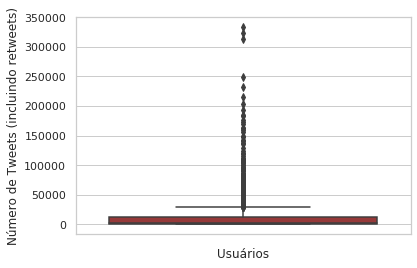

In [25]:
sns.set(style="whitegrid")
ax = sns.boxplot( y="statuses_count", data=users, color="Brown")
ax.set(xlabel='Usuários', ylabel='Número de Tweets (incluindo retweets)')
plt.savefig('figures/boxplot.png')



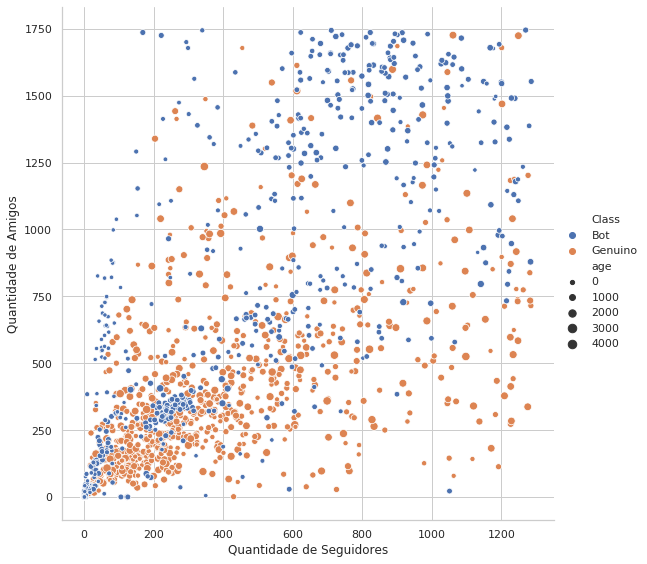

In [26]:
#to better representation, get only third quartile.

rel = users[(users["friends_count"]< users["friends_count"].quantile(0.75)) &(users["followers_count"]< users["followers_count"].quantile(0.75))]
#users[users["followers_count"]< users["followers_count"].quantile(0.75)]
ax = sns.relplot(
    x='followers_count',y='friends_count',hue='Class',size='age',
    height=8,data=rel)
ax.set(xlabel='Quantidade de Seguidores', ylabel='Quantidade de Amigos')
plt.savefig('figures/bolinhas.png')


In [27]:
rel.Alvo.value_counts()

1    994
0    818
Name: Alvo, dtype: int64

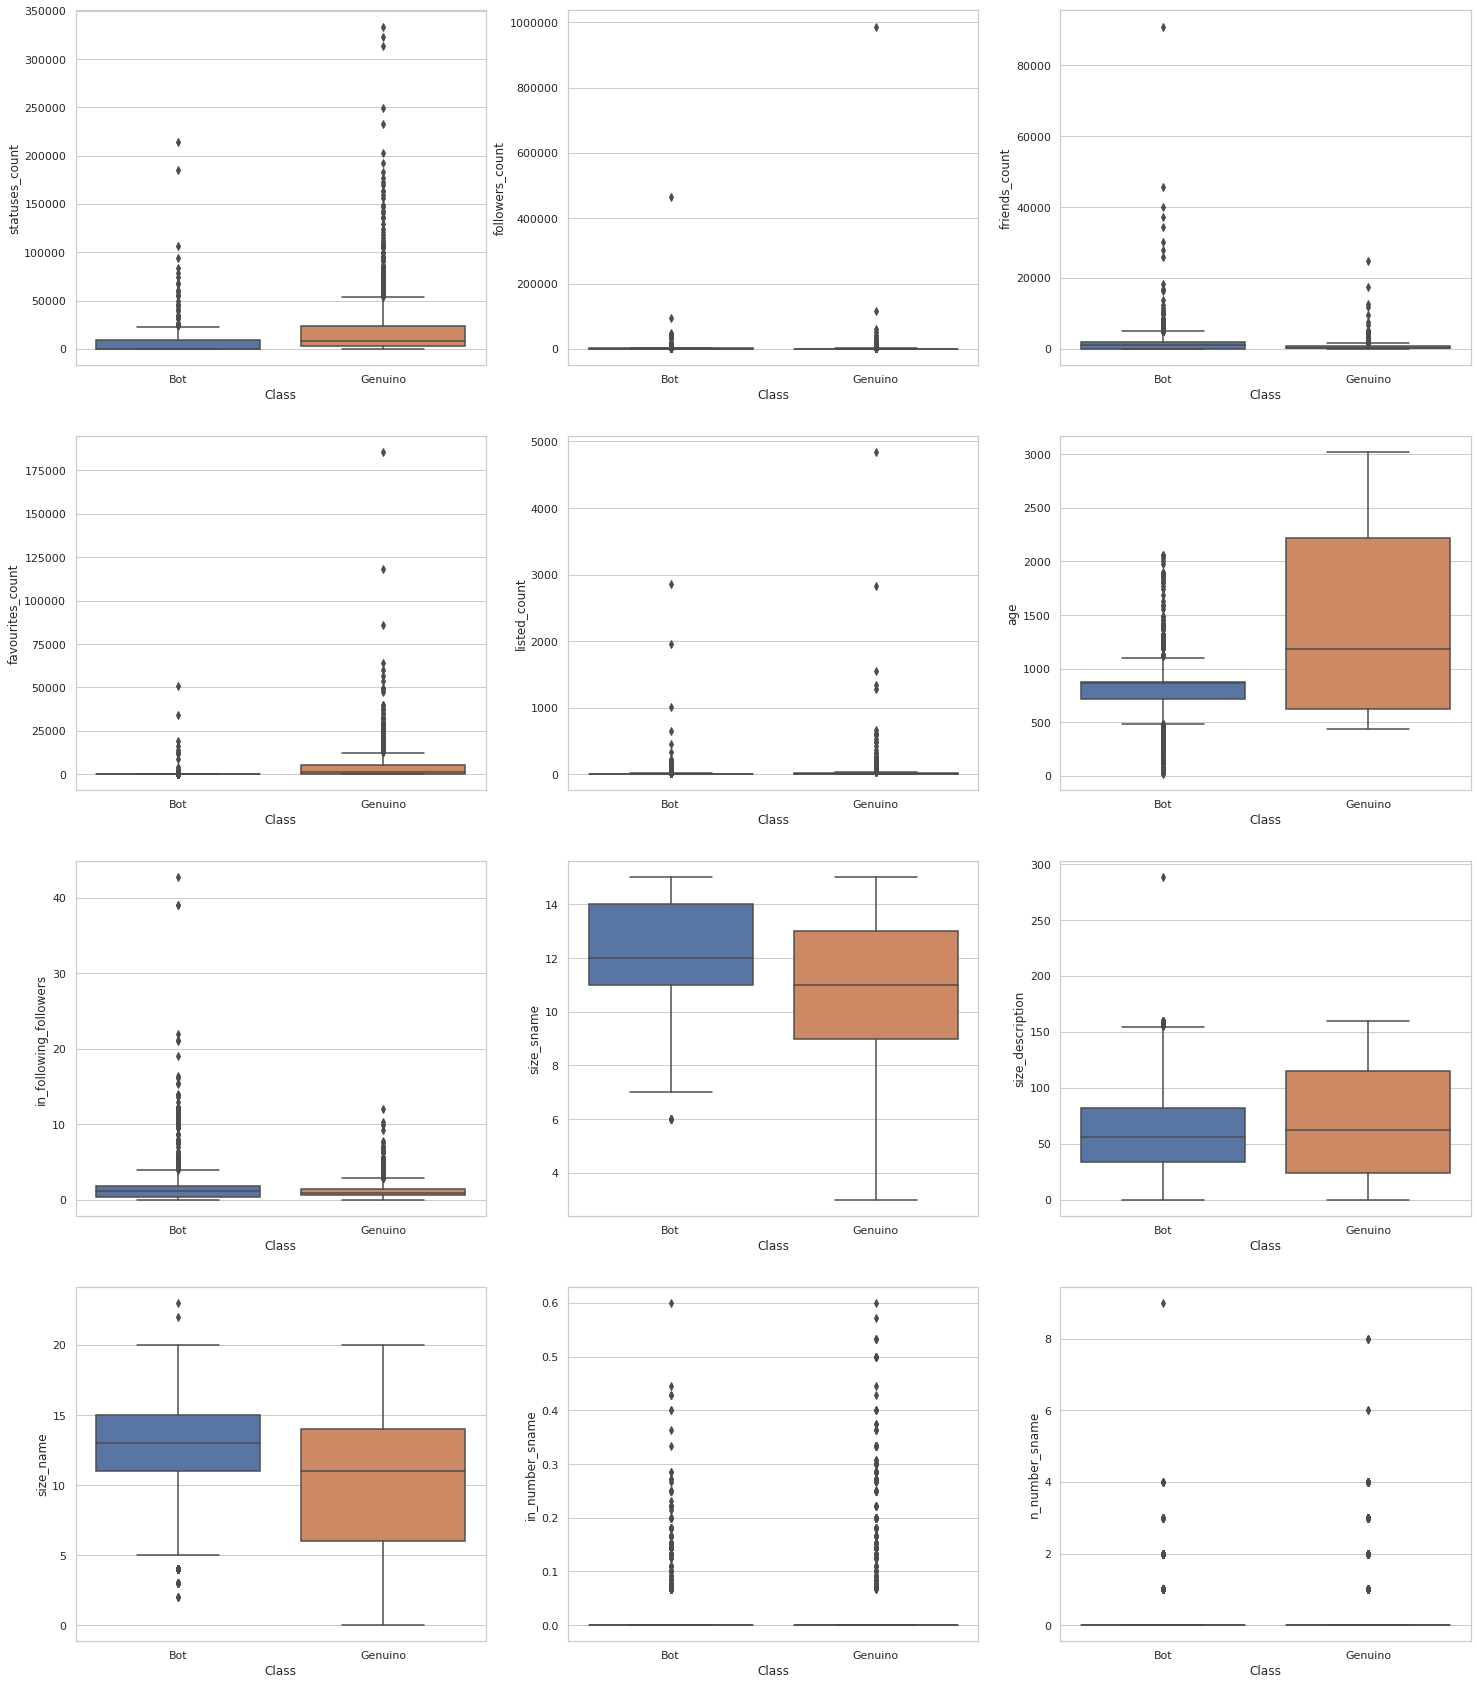

In [213]:
fig, ax = plt.subplots(4, 3, figsize=(25, 30))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='Class', y=var, data=users, ax=subplot)

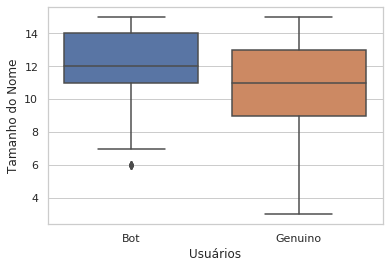

In [45]:
ax = sns.boxplot( x= 'Class', y="size_sname", data=users, )
ax.set(xlabel='Usuários', ylabel='Tamanho do Nome')
plt.savefig('figures/boxplot_size_sname.png')
#sns.boxplot(x='Class', data=users, ax=subplot)
#ax.set(xlabel='Trocou o tema padrão do perfil', ylabel='Quantidade')
#numerical[7]

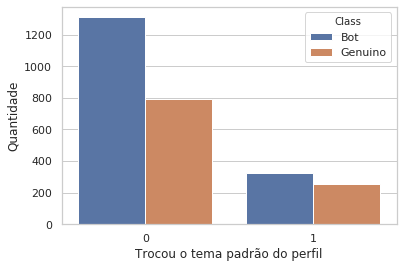

In [217]:
ax = sns.countplot(x='default_profile', hue="Class", data=users, )
ax.set(xlabel='Trocou o tema padrão do perfil', ylabel='Quantidade')
plt.savefig('figures/default_profile.png')




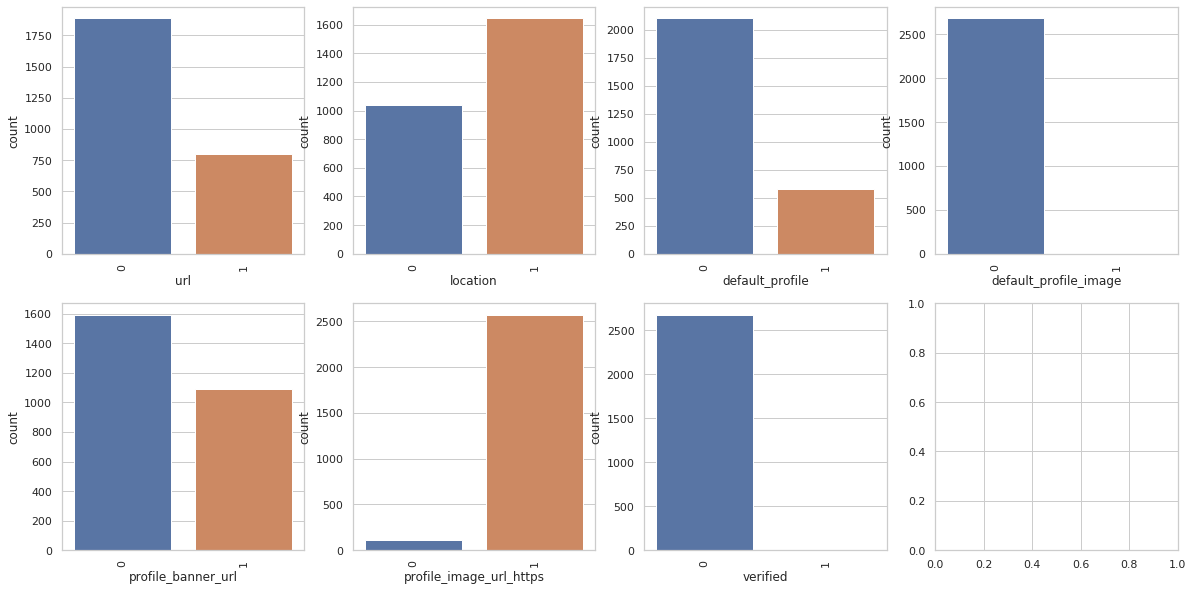

In [122]:
#How to behaves the categorical fields? 
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(users[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [123]:
#selecting columns. Droping some redundant features and desnecessary
columns_users=['user_id', 'statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'location','default_profile', 
       'default_profile_image', 'profile_banner_url','profile_image_url_https', 
       'verified','age','in_following_followers','n_number_sname',
       'size_sname', 'size_description', 'size_name', 'in_number_sname', 'Alvo']
columns_tweets=['user_id','n_retweet_mean',
       'n_favorite_mean', 'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean',
       'media_size_twitter', 'dp_size_twitter', 'in_tweets_reply',
       'n_tweet_dia', 'max_count_tweet_dia', 'count_dias_tweet',
       'in_tweet_dia']

tweets.user_id = tweets.user_id.astype('float')
users.user_id = users.user_id.astype('float')

a = tweets[columns_tweets].drop_duplicates('user_id')
b = users[columns_users]
database=pd.merge(b, a, on='user_id', how='right')
database.drop('user_id', axis=1, inplace=True)

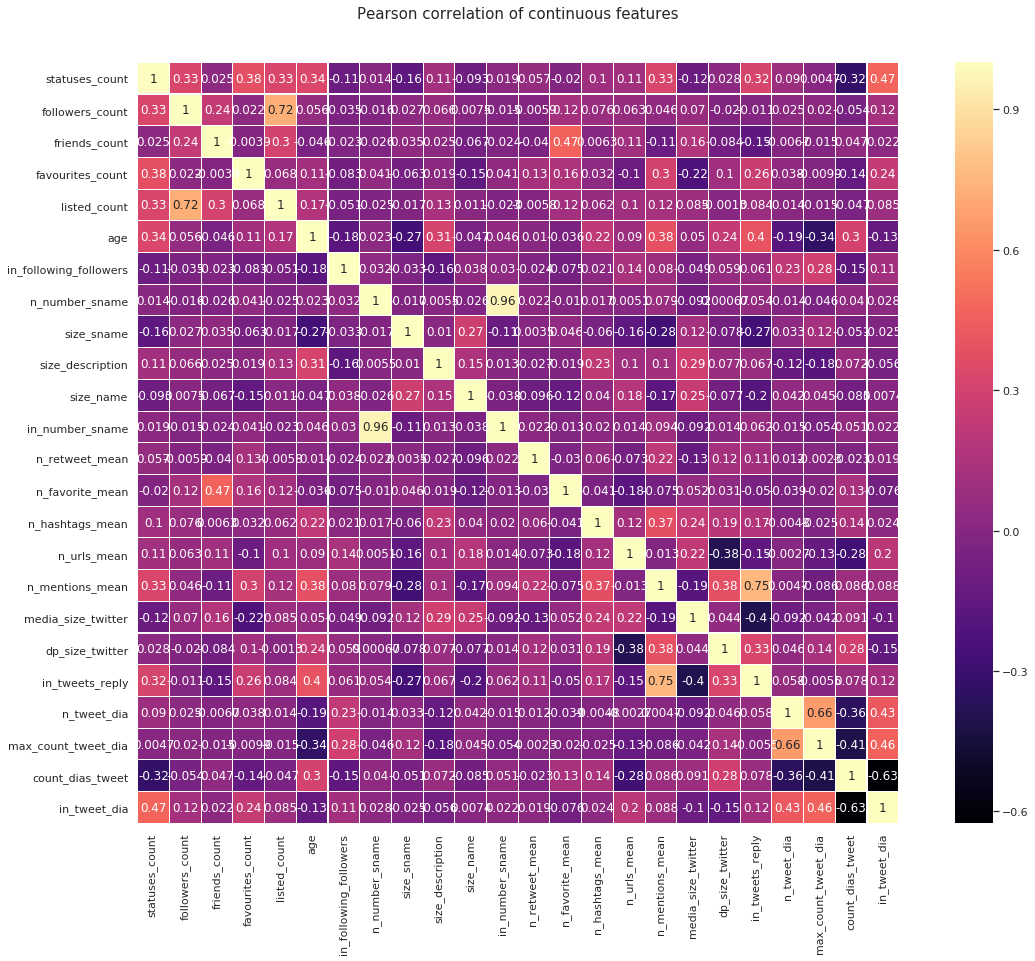

In [124]:
corre = database.drop('Alvo', axis=1)
colormap = plt.cm.magma
plt.figure(figsize=(20,14))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(corre.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [30]:
#cobvert binary atributes in int to calcuate the variance
binary= ['url', 'location','default_profile', 'default_profile_image', 'profile_banner_url',
       'profile_image_url_https', 'verified']

database[binary]=database[binary].astype(int)
print (database[binary].dtypes)

url                        int64
location                   int64
default_profile            int64
default_profile_image      int64
profile_banner_url         int64
profile_image_url_https    int64
verified                   int64
dtype: object


In [31]:
for x in database.columns:
    print('variance of ' +x+' is:', es.variance(database[x]))

variance of statuses_count is: 583193453.8485312
variance of followers_count is: 463536818.441035
variance of friends_count is: 9613462.98500871
variance of favourites_count is: 49035122.38735046
variance of listed_count is: 20585.742956135382
variance of url is: 0.20893639083661336
variance of location is: 0.23740918847547898
variance of default_profile is: 0.16955285919836363
variance of default_profile_image is: 0.0007454340080901842
variance of profile_banner_url is: 0.24140115447701266
variance of profile_image_url_https is: 0.04071404789858537
variance of verified is: 0.0026041514555016233
variance of age is: 359087.5781106363
variance of in_following_followers is: 5.252960259290784
variance of n_number_sname is: 0.6382400414327798
variance of size_sname is: 5.590462589087013
variance of size_description is: 1943.6180642302659
variance of size_name is: 18.55276115153978
variance of in_number_sname is: 0.005439950367331179
variance of Alvo is: 0.2379081842256707
variance of n_retw